In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('auto-mpg.csv')

In [3]:
df.shape

(398, 9)

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
df['car name'].value_counts()

ford pinto                          6
amc matador                         5
ford maverick                       5
toyota corolla                      5
amc hornet                          4
                                   ..
chevrolet cavalier                  1
vw rabbit c (diesel)                1
chevrolet chevelle concours (sw)    1
volvo 244dl                         1
mercury marquis                     1
Name: car name, Length: 305, dtype: int64

In [7]:
df.drop('car name',axis=1,inplace=True)

In [8]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [10]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [11]:
df[df['horsepower']=="?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [12]:
rows=df[df['horsepower']!="?"]

In [13]:
rows.shape

(392, 8)

In [14]:
df_1=rows

In [15]:
df_1.shape

(392, 8)

In [16]:
df_1.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.932994,-0.543800,-0.369855,-0.614535
weight,-0.832244,0.897527,0.932994,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.585005,0.212746,0.181528,1.000000


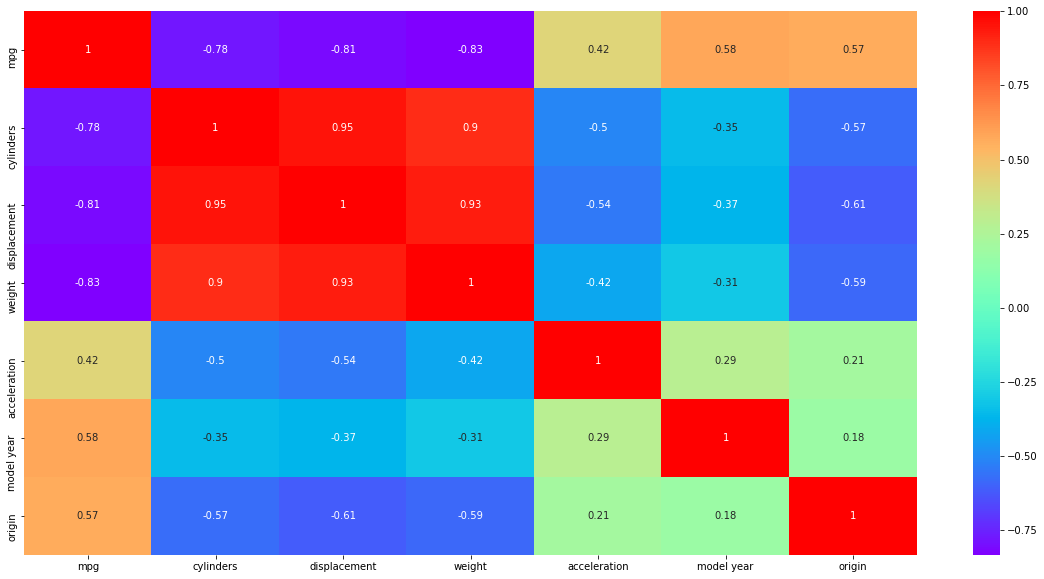

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(df_1.corr(),annot=True,cmap='rainbow')


C:\Users\Toshiba\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Toshiba\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Toshiba\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Toshiba\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


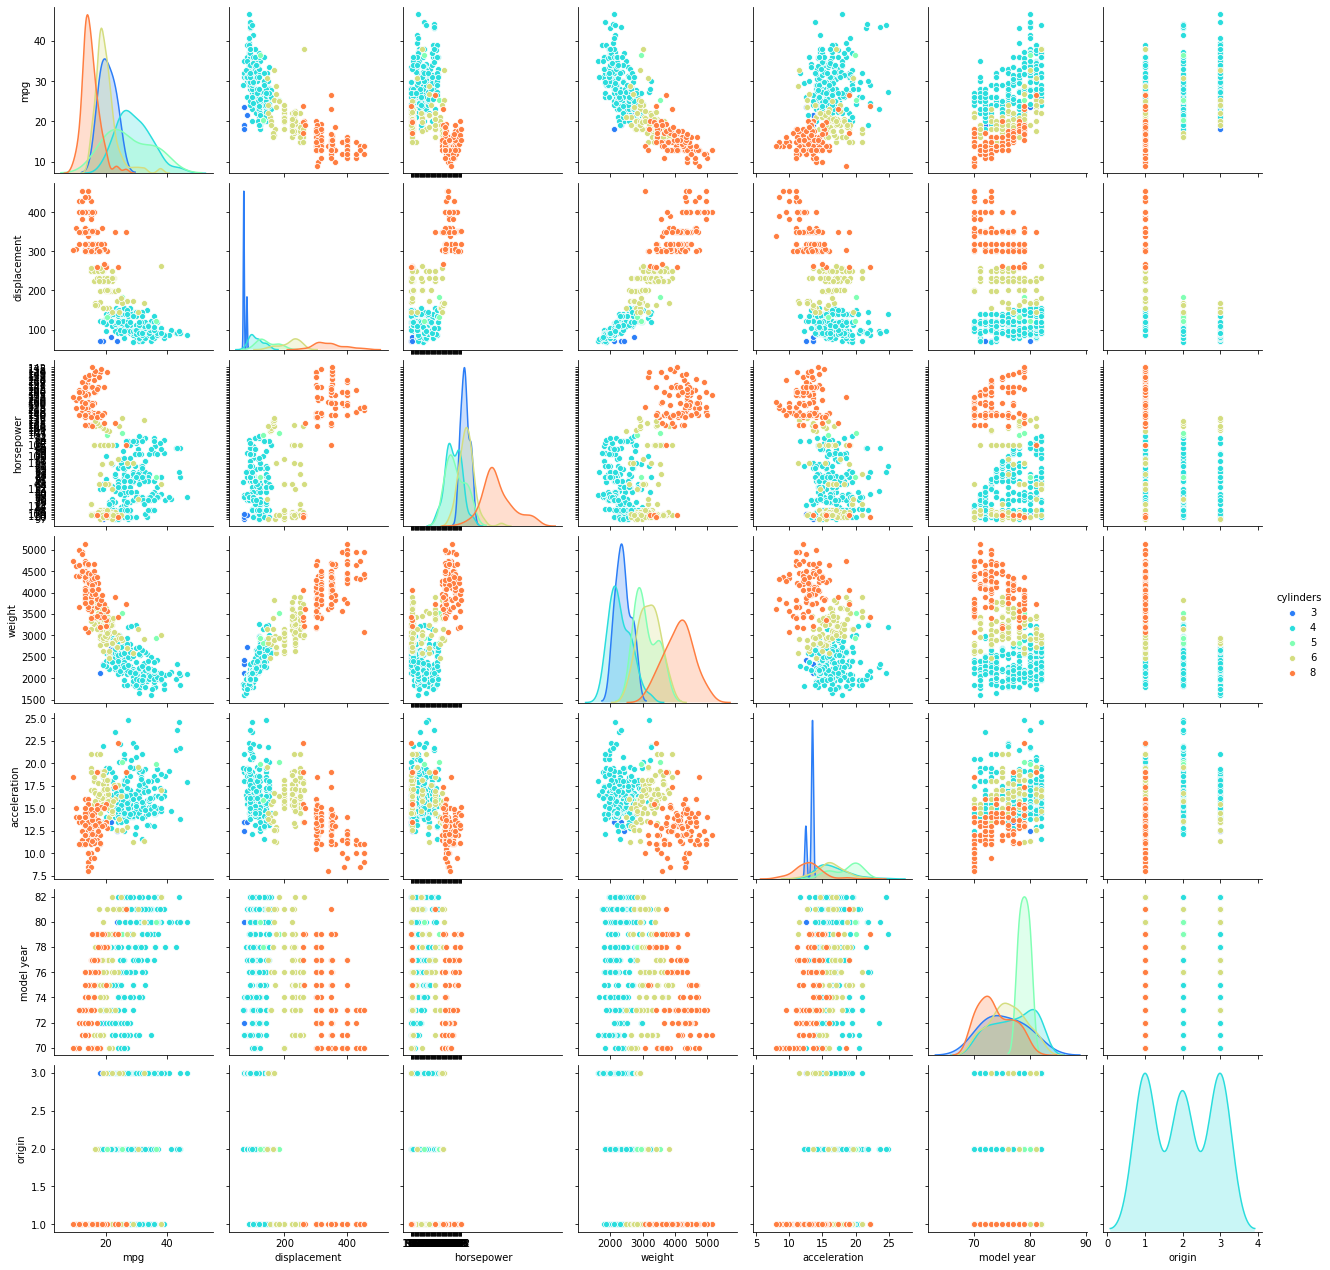

In [18]:
sns.pairplot(data=df_1,hue='cylinders',palette='rainbow')

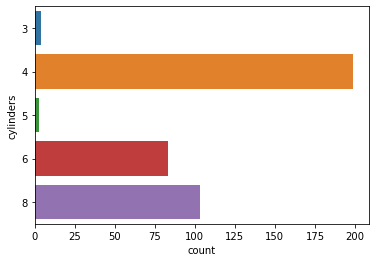

In [19]:
sns.countplot(y=df_1['cylinders']);

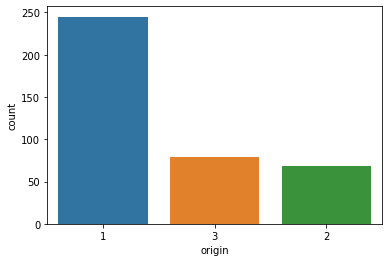

In [20]:
sns.countplot(df_1['origin'],order=[1,3,2]);

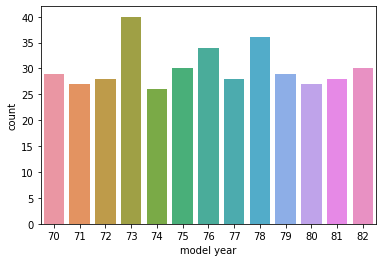

In [21]:
sns.countplot(df_1['model year']);

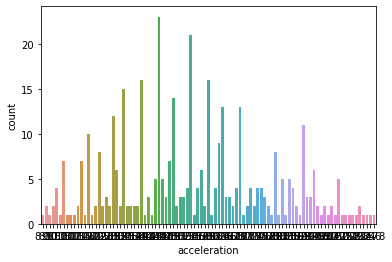

In [22]:
sns.countplot(df_1['acceleration']);

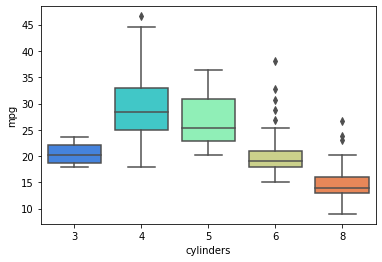

In [23]:
sns.boxplot(x='cylinders',y='mpg',palette='rainbow',data=df_1);

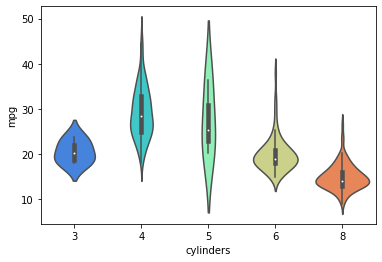

In [24]:
sns.violinplot(x='cylinders',y='mpg',palette='rainbow',data=df_1);

In [25]:
x=df_1.drop('mpg',axis=1)
y=df_1['mpg']

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [27]:
scalar=StandardScaler()

In [28]:
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [29]:
model={'Linear Regression': LinearRegression(),
      'tree': DecisionTreeRegressor(),
      'Random Forest': RandomForestRegressor(),
      'Adaboost': AdaBoostRegressor(),
      'xgboost': XGBRegressor(),
      'xgboost': XGBRFRegressor()}

In [30]:
x_score={}
y_score={}

for name,model in model.items():
    model.fit(x_train,y_train)
    x_score[name]=model.score(x_test,y_test)
    y_score[name]=model.score(x_train,y_train)


In [31]:
x_score

{'Linear Regression': 0.8363664681024059,
 'tree': 0.7606872880121158,
 'Random Forest': 0.9075924605577377,
 'Adaboost': 0.8796114603290127,
 'xgboost': 0.8986997671679482}

In [32]:
y_score

{'Linear Regression': 0.8165058068251202,
 'tree': 1.0,
 'Random Forest': 0.9824030926172093,
 'Adaboost': 0.908020793163174,
 'xgboost': 0.9661660712996678}

In [33]:
score=pd.DataFrame(x_score,index=['test_accuracy'])

In [34]:
score=score.T

In [35]:
score

,test_accuracy
Linear Regression,0.836366
tree,0.760687
Random Forest,0.907592
Adaboost,0.879611
xgboost,0.898700


In [36]:
score_1=pd.DataFrame(y_score,index=['train_accuracy'])

In [37]:
score_1=score_1.T

In [38]:
score_1

,train_accuracy
Linear Regression,0.816506
tree,1.000000
Random Forest,0.982403
Adaboost,0.908021
xgboost,0.966166


In [39]:
score_2=pd.concat([score,score_1],axis=1)

In [40]:
score_2

,test_accuracy,train_accuracy
Linear Regression,0.836366,0.816506
tree,0.760687,1.000000
Random Forest,0.907592,0.982403
Adaboost,0.879611,0.908021
xgboost,0.898700,0.966166


In [41]:
score_2['difference']=(score_2['test_accuracy']-score_2['train_accuracy'])*100

In [42]:
score_2

,test_accuracy,train_accuracy,difference
Linear Regression,0.836366,0.816506,1.986066
tree,0.760687,1.000000,-23.931271
Random Forest,0.907592,0.982403,-7.481063
Adaboost,0.879611,0.908021,-2.840933
xgboost,0.898700,0.966166,-6.746630


In [43]:
score_2['test_per']=score_2['test_accuracy']*100

In [44]:
score_2

,test_accuracy,train_accuracy,difference,test_per
Linear Regression,0.836366,0.816506,1.986066,83.636647
tree,0.760687,1.000000,-23.931271,76.068729
Random Forest,0.907592,0.982403,-7.481063,90.759246
Adaboost,0.879611,0.908021,-2.840933,87.961146
xgboost,0.898700,0.966166,-6.746630,89.869977


In [45]:
score_2['train_per']=score_2['train_accuracy']*100

In [46]:
score_2

,test_accuracy,train_accuracy,difference,test_per,train_per
Linear Regression,0.836366,0.816506,1.986066,83.636647,81.650581
tree,0.760687,1.000000,-23.931271,76.068729,100.000000
Random Forest,0.907592,0.982403,-7.481063,90.759246,98.240309
Adaboost,0.879611,0.908021,-2.840933,87.961146,90.802079
xgboost,0.898700,0.966166,-6.746630,89.869977,96.616607


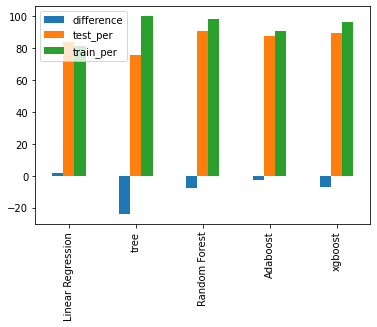

In [47]:
score_2[['difference','test_per','train_per']].plot.bar();

In [48]:
poly_feat=PolynomialFeatures(degree=2)
poly_feat_x=poly_feat.fit_transform(x)

In [49]:
x_train,x_test,y_train,y_test=train_test_split(poly_feat_x,y,test_size=0.2,random_state=0)

In [50]:
model={'Linear Regression': LinearRegression(),
      'tree': DecisionTreeRegressor(),
      'Random Forest': RandomForestRegressor(),
      'Adaboost': AdaBoostRegressor(),
      'xgboost': XGBRegressor(),
      'xgboost': XGBRFRegressor()}

In [51]:
x_score={}
y_score={}

for name,model in model.items():
    model.fit(x_train,y_train)
    x_score[name]=model.score(x_test,y_test)
    y_score[name]=model.score(x_train,y_train)


In [52]:
x_score

{'Linear Regression': 0.8901788877238358,
 'tree': 0.823958759440173,
 'Random Forest': 0.9033266675280318,
 'Adaboost': 0.8842747878170193,
 'xgboost': 0.9000615313263725}

In [53]:
y_score

{'Linear Regression': 0.8940467032916684,
 'tree': 1.0,
 'Random Forest': 0.9816854293298207,
 'Adaboost': 0.9184035888554181,
 'xgboost': 0.9733394272191196}

In [54]:
score=pd.DataFrame(x_score,index=['test_accuracy'])

In [55]:
score_1=pd.DataFrame(y_score,index=['train_accuracy'])

In [56]:
score=score.T

In [57]:
score_1=score_1.T

In [58]:
score_2=pd.concat([score,score_1],axis=1)

In [59]:
score_2

,test_accuracy,train_accuracy
Linear Regression,0.890179,0.894047
tree,0.823959,1.000000
Random Forest,0.903327,0.981685
Adaboost,0.884275,0.918404
xgboost,0.900062,0.973339


In [60]:
LR=LinearRegression().fit(x_train,y_train)

In [61]:
LR

LinearRegression()

In [62]:
y_pred=LR.predict(x_test)

In [63]:
y_pred

array([29.73647172, 23.93885662, 12.93730309, 36.35606314, 35.10356539,
       21.67207868, 37.60594541, 28.48603125, 19.30954202, 26.80126273,
       28.18375082, 13.37683661, 23.4444062 , 14.00930118, 16.58717338,
       32.27541292, 23.3400883 , 13.51147109, 25.90481779, 25.71113864,
       17.05519559, 14.68857661, 19.41111193, 25.25637144, 32.44352504,
       13.646685  , 28.90899787, 25.01480413, 19.53199448, 15.21794549,
       22.70442992, 33.14332954, 23.28603214, 29.85425906, 18.98678027,
       28.15346781, 30.06714361, 14.2147614 , 14.33883331, 14.01712318,
       14.34753123, 33.45071964, 31.53479695, 14.09281411, 31.246306  ,
       15.39241315, 31.08669935, 13.49579944, 15.47512128, 19.14861005,
       26.87129745, 14.51998871, 10.41944471, 20.46950059, 32.27208334,
       30.03721264, 25.80996022, 18.79188804, 31.66005214, 24.37975681,
       19.81249617, 28.21164282, 32.02302608, 13.39901879, 26.4681828 ,
       15.23917059, 14.76948788, 29.18114204, 21.74980894, 36.50

In [64]:
result= pd.DataFrame()
result['Y_prediction']=y_pred
result['Y_true']=y_test.values
result['difference']= result['Y_true']-result['Y_prediction']
result

,Y_prediction,Y_true,difference
0,29.736472,28.0,-1.736472
1,23.938857,22.3,-1.638857
2,12.937303,12.0,-0.937303
3,36.356063,38.0,1.643937
4,35.103565,33.8,-1.303565
...,...,...,...
74,19.819094,23.0,3.180906
75,13.602359,14.0,0.397641
76,25.248142,26.0,0.751858
77,17.468158,19.2,1.731842


In [65]:
mse= mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mse)
print('\n')
print('Mean Squared error :',mae)

Mean Absolute Error: 6.825965811074358


Mean Squared error : 1.8391367083731645
